In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

In [72]:
df = pd.read_csv('star.csv')

In [73]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [74]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x_test in X:
            distances = np.sqrt(np.sum((self.X_train - x_test) ** 2, axis=1))
            nearest_neighbors = np.argsort(distances)[:self.k]
            knn_labels = self.y_train.iloc[nearest_neighbors]
            most_common = np.argmax(np.sum(knn_labels, axis=0))
            predictions.append(most_common)
        return predictions

In [75]:
# Extract numeric columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [76]:
# Separate features and target variable
X = df.drop('class', axis=1).values

# Perform one-hot encoding
y = pd.get_dummies(df['class'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [77]:
k_values = list(range(1, 21))  # Adjust the range as needed

# Initialize lists to store performance metric scores
accuracy_scores = []

In [78]:
binarytrain = pd.to_numeric(y_train['STAR'])

In [79]:
binarytrain = binarytrain.values

In [80]:
# Initialize progress bar
with tqdm(total=len(k_values)) as pbar:
    for k in k_values:
        knn = KNN(k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_train)
        
        # Calculate accuracy by comparing each column separately
        accuracy = np.mean(binarytrain == y_pred)
        accuracy_scores.append(accuracy)
            
        # Print individual accuracies for each k-value
        print(f"Overall Accuracy for K={k}: {accuracy}")
        
        # Update progress bar
        pbar.update(1)

  5%|▌         | 1/20 [00:37<11:59, 37.88s/it]

Overall Accuracy for K=1: 1.0


 10%|█         | 2/20 [01:15<11:22, 37.92s/it]

Overall Accuracy for K=2: 0.9642129943851422


 15%|█▌        | 3/20 [01:53<10:45, 37.98s/it]

Overall Accuracy for K=3: 0.9691491330906399


 20%|██        | 4/20 [02:31<10:05, 37.84s/it]

Overall Accuracy for K=4: 0.9584747331400012


 25%|██▌       | 5/20 [03:09<09:26, 37.77s/it]

Overall Accuracy for K=5: 0.9600172764854692


 30%|███       | 6/20 [03:47<08:50, 37.88s/it]

Overall Accuracy for K=6: 0.9520577528228543


 35%|███▌      | 7/20 [04:24<08:11, 37.78s/it]

Overall Accuracy for K=7: 0.9560066637872524


 40%|████      | 8/20 [05:03<07:34, 37.91s/it]

Overall Accuracy for K=8: 0.9503301042759301


 45%|████▌     | 9/20 [05:41<06:57, 37.98s/it]

Overall Accuracy for K=9: 0.9505152094773863


 50%|█████     | 10/20 [06:19<06:20, 38.05s/it]

Overall Accuracy for K=10: 0.9453322638366138


 55%|█████▌    | 11/20 [06:57<05:43, 38.14s/it]

Overall Accuracy for K=11: 0.9457641759733448


 60%|██████    | 12/20 [07:35<05:04, 38.06s/it]

Overall Accuracy for K=12: 0.9423088788794965


 65%|██████▌   | 13/20 [08:14<04:28, 38.36s/it]

Overall Accuracy for K=13: 0.9437897204911458


 70%|███████   | 14/20 [08:52<03:49, 38.20s/it]

Overall Accuracy for K=14: 0.9396557043252916


 75%|███████▌  | 15/20 [09:29<03:09, 37.98s/it]

Overall Accuracy for K=15: 0.9414450546060344


 80%|████████  | 16/20 [10:07<02:31, 37.93s/it]

Overall Accuracy for K=16: 0.9375578453754551


 85%|████████▌ | 17/20 [10:45<01:53, 37.95s/it]

Overall Accuracy for K=17: 0.9398408095267478


 90%|█████████ | 18/20 [11:23<01:15, 37.79s/it]

Overall Accuracy for K=18: 0.9364472141667181


 95%|█████████▌| 19/20 [12:00<00:37, 37.75s/it]

Overall Accuracy for K=19: 0.9376195471092738


100%|██████████| 20/20 [12:39<00:00, 37.98s/it]

Overall Accuracy for K=20: 0.9347812673536127
The best K-value is: 1


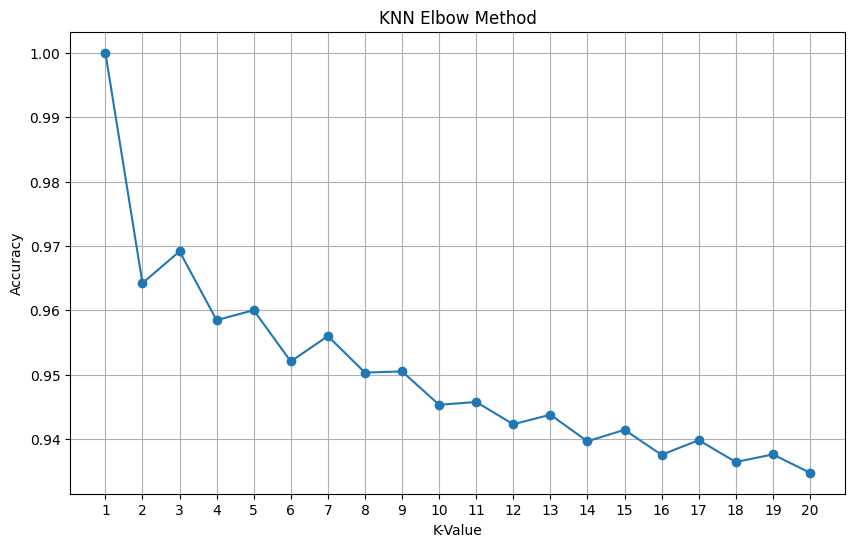

In [89]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('KNN Elbow Method')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [90]:
diffs = np.diff(accuracy_scores)
elbow_point = np.argmax(diffs) + 1
best_k = k_values[elbow_point]

print(f"The best K-value is: {best_k}")

The best K-value is: 3


In [92]:
pred = pd.read_csv("Unknown Cosmic Observation - Sheet1.csv")

In [93]:
# Extract numeric columns
numeric_cols = pred.select_dtypes(include=['int', 'float']).columns

# Scale the numeric columns
pred[numeric_cols] = scaler.transform(pred[numeric_cols])

In [94]:
# Separate features and target variable
pred = pred.drop('class', axis=1).values

In [95]:
knn = KNN(best_k)
knn.fit(X, y)
knn.predict(pred)

[0]